# CE-40717: Machine Learning

## HW3-Kernel Regression

[<img src="./images/ML2021S-HW3.jpg" width=666>](https://quera.ir/assignment/27913/get_pdf_file)

---
---

In [1]:
import numpy as np
import pandas as pd
import random, math
 
import matplotlib.pyplot as plt

In [2]:
def indicator_kernel(sample, train_samples, train_labels, h):
    labels = []
    for i in range(len(train_samples)):
        x = np.matrix(train_samples.iloc[i])
        diff = x - np.matrix(sample)
        t = train_labels[i]
        projection = np.dot(diff, diff.T)
        if projection <= h:
            labels.append(t)
    if labels:
        return sum(labels) / len(labels)
    else:
        index = random.randint(0, len(train_samples) - 1)
        return train_labels[index]

def gaussian_kernel(sample, train_samples, train_labels, sigma, eps=np.finfo(dtype=np.float64).eps):
    sum_of_labels = 0
    sum_of_kernels = 0
    for i in range(len(train_samples)):
        x = np.matrix(train_samples.iloc[i])
        diff = x - np.matrix(sample)
        t = train_labels[i]
        projection = np.dot(diff, diff.T)
        weight = math.exp(-projection / (2 * sigma))
        sum_of_labels += weight * t
        sum_of_kernels += weight
    return sum_of_labels / (sum_of_kernels+eps)

def regression_model(model_type, params):
    mse = []
    for param in params:
        predictions = []
        se = []
        for i in range(len(test)):
            prediction = 0
            if model_type == "indicator":
                prediction = indicator_kernel(test.iloc[i], train, train_t, param ** 2)
            elif model_type == "gaussian":
                prediction = gaussian_kernel(test.iloc[i], train, train_t, param ** 2)
            se.append((prediction - test_t[train_length + i]) ** 2)
            predictions.append(prediction)
        mse.append(sum(se) / len(se) / 100_000_000)
    return mse

In [3]:
data = pd.read_csv("./data/train.csv")

# target values
t = data["SalePrice"]

# droping uncessary columns
data.drop(["Id", "SalePrice"], axis=1, inplace=True)

# one-hot encoding
data = pd.get_dummies(data)

# filling nan values in dataset
for column in data.columns:
    s = data[column].isna().value_counts()
    if s[0] < 1460:
        data[column].fillna( sum(data[column].fillna(0)) / len(data[column] ), inplace=True)
    data[column] /= np.linalg.norm(data[column])

# splitting dataset to train and test
train_length = (85 * len(data)) // 100
train = data.iloc[:train_length, :]
train_t = t[:train_length]
test = data.iloc[train_length:, :]
test_t = t[train_length:]


h_values = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1, 1.5]
sigma_values = [0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8, 1]

mse_i = regression_model("indicator", h_values)
mse_g = regression_model("gaussian", sigma_values)

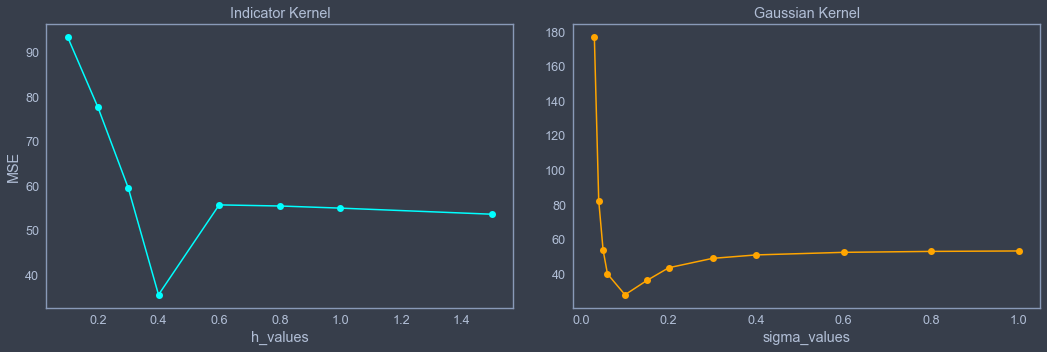

In [4]:
from jupyterthemes import jtplot
jtplot.style(theme="onedork", context="notebook", grid=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.tight_layout(pad=2)

axes[0].plot(h_values, mse_i, c="cyan", marker='o', markersize=7)
axes[0].set_xlabel(xlabel="h_values")
axes[0].set_ylabel(ylabel="MSE")
axes[0].set_title(label="Indicator Kernel")

axes[1].plot(sigma_values, mse_g, c="orange", marker='o', markersize=7)
axes[1].set_xlabel(xlabel="sigma_values")
axes[1].set_title(label="Gaussian Kernel");

### Part1:

<div dir="rtl">
    رابطهٔ وزن‌ها به شکل زیر است (N=number of samples):
</div>

\begin{equation*}
    y(x) = \frac{\sum_{i=1}^N y_i\times I(x, x_i)}{\sum_{i=1}^NI(x, x_i)}
\end{equation*}

<div dir="rtl">
    نقطهٔ کمینه را در نمودار مشاهده می‌کنید.
</div>

### Part2:

<div dir="rtl">
    <b>ب-1</b>: رابطهٔ پیش‌بینی در زیر آمده است. دقت کنید که ضرایب ثابت ساده می‌شوند و اهمیتی در این رابطه ندارند.
</div>

\begin{equation*}
    y(x) = \frac{\sum_{i=1}^Ny_i\,e^{-(\frac{||x - x_i||}{2\,\sigma})^2}}{\sum_{i=1}^Ne^{-(\frac{||x - x_i||}{2\,\sigma})^2}}
\end{equation*}

<div dir="rtl">
    طبق نمودار، به ازای مقادیر حدود ۰.۰۴ و ۰.۰۵ کمترین میزان خطا رخ می‌دهد.
</div>

<div dir="rtl">
    <b>ب-2</b>:
    بله، تعداد ویژگی‌ها برای انتخاب پارامتر سیگما اهمیت دارد. با کم کردن بعد فضا، میزان اختلافات نمونه آزمون با نمونه‌های آموزش در بازه‌ای کوچکتر قرار می‌گیرد و سیگمای حالت قبل، نتیجه و عملکرد مشابه نخواهد داشت. 
</div>

<div dir='rtl'>
    <b>ب-3</b>:
    از <a href="https://www.stat.cmu.edu/~ryantibs/advmethods/notes/kernel.pdf">اینجا</a> مطالعه کنید.
</div>

### Part3:

<div dir="rtl">
    نتیجهٔ قسمت <b>ب</b> به مراتب بهتر است. به این دلیل که شباهت بر اساس فاصلهٔ دو نمونه را با حساسیت کمتری بکار می‌برد. چون فاصلهٔ دو نمونه اطلاعات چندانی (مانند اینکه تفاوت‌ها دقیقا در کدام ویژگی‌ها رخ داده و اختلاف در هر ویژگی چقدر است) ندارد، این کار نتیجه می‌دهد. مزیت دیگر هسته گاوسی این است که از تمام نقطه‌ها بهره می‌گیرد و نه صرفا نقاطی که بسیار نزدیک هستند. همانطور که می‌بینید، به ازای $h$های بسیار کوچک الگوریتم اول خطای قابل توجهی دارد. 
</div>

### Part4:

<div dir="rtl">
    نمی‌توان با قطعیت گفت و بنا به شرایط، هر یک ممکن است عملکرد بهتری داشته باشند. به عنوان مثال پارامتر هم‌بستگی ویژگی‌ها با هم را در نظر بگیرید. اگر هم‌بستگی ویژگی‌ها بسیار کم باشد آن‌گاه انتظار می‌رود در شرایط برابر رگرسیون با هستهٔ گاوسی نتیجه‌ای نزدیک به رگرسیون خطی دهد. چرا که میزان اختلاف نمونه‌ها تقریبا اطلاعات مشابهی نسبت به رگرسیون خطی می‌دهد.
    اما اگر چند ویژگی با یکدیگر هم‌بسته باشند آنگاه انتظار می‌رود رگرسیون خطی عملکرد بهتری داشته باشد چرا که اختلاف نمونه‌ها نسبت به زمانی که وزن ویژگی‌ها را بدانیم اطلاعات کمتری می‌دهد؛ البته مهم است بدانیم که اختلاف ایجاد شده، ناشی از اختلاف در ویژگی‌های ناهم‌بسته است یا هم‌بسته.
    دقت کنید تاثیر تنکی داده‌ها آنجاست که باعث می‌شود مدل رگرسیون خطی به خوبی فیت نشود. دلیل آن به تعداد زیادی صفر و درآیه‌ی خالی در ماتریس برمی‌گردد که اطلاعاتی در بر ندارند.
</div>